In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/anurag/Documents/zbasic/Projects-main/data/IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(418)

In [7]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [8]:
df.columns = df.columns.str.strip().str.lower()

In [9]:
import re

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove special chars
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

df['cleaned_review'] = df['review'].apply(clean_text)


In [10]:
df.drop(columns = ['review'], inplace=True)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews
X = tfidf.fit_transform(df['cleaned_review']).toarray()


In [12]:
y = df['sentiment'].map({'positive': 1, 'negative': 0}) 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import classification_report
y_proba = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      4961
    Positive       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000

Accuracy Score: 0.8948
ROC AUC Score: 0.9615497406862233


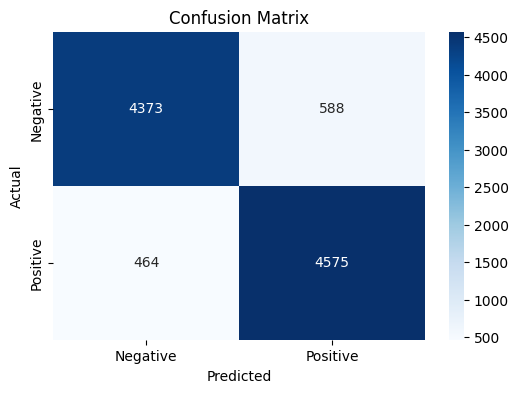

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [31]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8534
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [32]:
y_proba = nb_model.predict_proba(X_test)[:, 1]

In [33]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy Score: 0.8948
ROC AUC Score: 0.9308539131520761


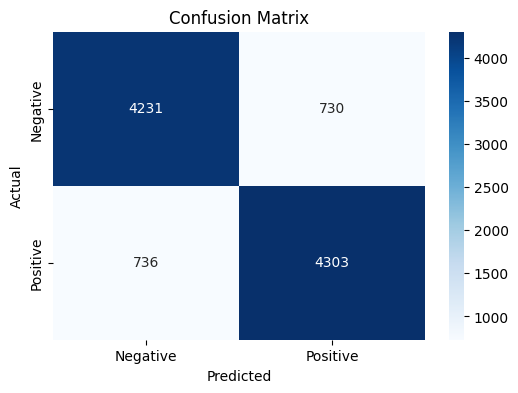

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize and train XGBoost
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# ROC AUC Score
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))

XGBoost Accuracy: 0.8682
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      4961
           1       0.86      0.89      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

XGBoost ROC AUC Score: 0.9429426886331764


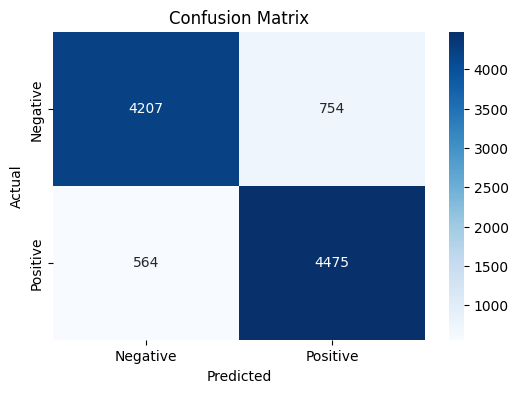

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Project Report: IMDB Movie Review Sentiment Classification

1. Dataset Overview


The dataset consists of 50,000 movie reviews labeled with sentiment categories: positive and negative. The data is balanced, with 25,000 reviews in each class.
Class 	Count
Positive 	25,000
Negative 	25,000

The reviews are stored as text, and the sentiment labels are categorical.

2. Data Preprocessing


    Text Vectorization: Utilized TfidfVectorizer to convert text reviews into numerical feature vectors, capturing important word importance and reducing the impact of frequently occurring words.

4. Model Training and Performance
Three models were trained and evaluated:

    Logistic Regression:

   
        Achieved an accuracy of approximately 89.48%
        ROC AUC score of 0.962
        Performance metrics indicate high precision and recall for both classes.

    Naive Bayes:

   
        Achieved an accuracy of 85.34%
        ROC AUC score of 0.931
        Slightly lower performance compared to Logistic Regression but still effective.

    XGBoost:

   
        Achieved an accuracy of 86.82%
        ROC AUC score of 0.943
        Demonstrated strong predictive power with balanced precision and recall.

5. Evaluation Metrics  
Model 	Accuracy 	ROC AUC 	Precision (Positive) 	Recall (Positive) 	F1-Score (Positive) 	Support (Positive) 	Precision (Negative) 	Recall (Negative) 	F1-Score (Negative)


Logistic Regression 	89.48% 	0.962 	0.89 	0.91 	0.90 	5039 	0.90 	0.88 	0.89


Naive Bayes 	85.34% 	0.931 	0.85 	0.85 	0.85 	5039 	0.85 	0.85 	0.85

XGBoost 	86.82% 	0.943 	0.88 	0.85 	0.86 	4961 	0.86 	0.89 	0.87

7. Conclusion
The models demonstrated good performance in classifying movie reviews as positive or negative based on textual content. Logistic Regression showed the highest accuracy and ROC AUC, making it a strong candidate for deployment. Naive Bayes, while slightly less accurate, offers computational efficiency. XGBoost provided competitive results with balanced metrics.

8. Future Recommendations  

    Incorporate advanced NLP techniques such as word embeddings (e.g., Word2Vec, GloVe) for richer feature representations.
    Perform hyperparameter tuning to optimize model performance further.
    Explore deep learning models like LSTM or Transformer-based architectures for improved context understanding.
